In [1]:
# Importamos librerias necesarias
import pandas as pd
import os
import matplotlib.pyplot as plt

# Acceder a la ruta donde se encuentra los archivos
ruta = os.getcwd()

# Leemos el archivo .csv
df = pd.read_csv(ruta+r"\Model_creditoPersonal.csv")

In [2]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
print("Cantidad de registros y columnas:")
print(df.shape)

Cantidad de registros y columnas:
(5000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df = df.drop(["CD Account", "CreditCard"], axis = 1).set_axis(['ID_CLIENTE', 'EDAD',
                  'EXPERIENCIA_LABORAL', 'INGRESOS_ANUALES_USD', 'CODIGO_POSTAL',
                  'INTEGRANTES_FAMILIA', 'PROMEDIO_GASTO_TARJETA', 'NIVEL_EDUCATIVO',
                  'VALOR_HIPOTECA', 'ACEPTO_CREDITO?', 'TIENE_INVERSIONES?', 'USA_HOME_BANKING?'], axis=1)
df.head(2)

,ID_CLIENTE,EDAD,EXPERIENCIA_LABORAL,INGRESOS_ANUALES_USD,CODIGO_POSTAL,INTEGRANTES_FAMILIA,PROMEDIO_GASTO_TARJETA,NIVEL_EDUCATIVO,VALOR_HIPOTECA,ACEPTO_CREDITO?,TIENE_INVERSIONES?,USA_HOME_BANKING?
0,1,25,1,49,91107,4,1.6,1,0,0,1,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0


In [7]:
# Diccionarios con los valores a reemplazar
dic = {
    1: "Secundario Incompleto",
    2: "Secundario Completo",
    3: "Universitario Completo"}

# Reemplazamos los número utilizados como categorias
df['NIVEL_EDUCATIVO'] = df['NIVEL_EDUCATIVO'].map(dic)

In [8]:
# Diccionarios con los valores a reemplazar
dic = {
    0: "No",
    1: "Si"}

# Reemplazamos los número utilizados como categorias
df['USA_HOME_BANKING?'] = df['USA_HOME_BANKING?'].map(dic)
df['ACEPTO_CREDITO?'] = df['ACEPTO_CREDITO?'].map(dic)
df['TIENE_INVERSIONES?'] = df['TIENE_INVERSIONES?'].map(dic)

In [9]:
df.head()

,ID_CLIENTE,EDAD,EXPERIENCIA_LABORAL,INGRESOS_ANUALES_USD,CODIGO_POSTAL,INTEGRANTES_FAMILIA,PROMEDIO_GASTO_TARJETA,NIVEL_EDUCATIVO,VALOR_HIPOTECA,ACEPTO_CREDITO?,TIENE_INVERSIONES?,USA_HOME_BANKING?
0,1,25,1,49,91107,4,1.6,Secundario Incompleto,0,No,Si,No
1,2,45,19,34,90089,3,1.5,Secundario Incompleto,0,No,Si,No
2,3,39,15,11,94720,1,1.0,Secundario Incompleto,0,No,No,No
3,4,35,9,100,94112,1,2.7,Secundario Completo,0,No,No,No
4,5,35,8,45,91330,4,1.0,Secundario Completo,0,No,No,No


In [10]:
df["INGRESOS_ANUALES_USD"] = df["INGRESOS_ANUALES_USD"] * 1000

In [11]:
df[["EDAD", "EXPERIENCIA_LABORAL", "INGRESOS_ANUALES_USD"]].describe()

,EDAD,EXPERIENCIA_LABORAL,INGRESOS_ANUALES_USD
count,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73774.200000
std,11.463166,11.467954,46033.729321
min,23.000000,-3.000000,8000.000000
25%,35.000000,10.000000,39000.000000
50%,45.000000,20.000000,64000.000000
75%,55.000000,30.000000,98000.000000
max,67.000000,43.000000,224000.000000


In [12]:
df = df.reset_index(drop=True)
df.drop(["ID_CLIENTE"], axis=1, inplace=True)

# Generar la columna "ID_CLIENTE" con el formato deseado
df['ID_CLIENTE'] = df.index + 1  # Para el número de registro
df['ID_CLIENTE'] = df['ID_CLIENTE'].apply(lambda x: f"ID_CLIENTE_{x:04d}")  # Formatear como "REGISTRO_0001"

# Mover la columna "ID_CLIENTE" al primer lugar
id_registro = df.pop('ID_CLIENTE')
df.insert(0, 'ID_CLIENTE', id_registro)

In [13]:
df.head()

,ID_CLIENTE,EDAD,EXPERIENCIA_LABORAL,INGRESOS_ANUALES_USD,CODIGO_POSTAL,INTEGRANTES_FAMILIA,PROMEDIO_GASTO_TARJETA,NIVEL_EDUCATIVO,VALOR_HIPOTECA,ACEPTO_CREDITO?,TIENE_INVERSIONES?,USA_HOME_BANKING?
0,ID_CLIENTE_0001,25,1,49000,91107,4,1.6,Secundario Incompleto,0,No,Si,No
1,ID_CLIENTE_0002,45,19,34000,90089,3,1.5,Secundario Incompleto,0,No,Si,No
2,ID_CLIENTE_0003,39,15,11000,94720,1,1.0,Secundario Incompleto,0,No,No,No
3,ID_CLIENTE_0004,35,9,100000,94112,1,2.7,Secundario Completo,0,No,No,No
4,ID_CLIENTE_0005,35,8,45000,91330,4,1.0,Secundario Completo,0,No,No,No


In [14]:
# Exportamos los datos finales
# df.to_csv("Creditos Personales (columnas númericas).csv", encoding="utf-8", index=False)

In [15]:
# Pasar la columna a str
df["PROMEDIO_GASTO_TARJETA"] = df["PROMEDIO_GASTO_TARJETA"].apply(lambda _: str(_))

# Reemplazar distintos datos
df["PROMEDIO_GASTO_TARJETA"] = df["PROMEDIO_GASTO_TARJETA"].apply(lambda x: x.replace(".",","))

In [16]:
# Exportamos los datos finales
# df.to_csv("Creditos Personales.csv", encoding="utf-8", index=False)

In [17]:
def plot_histograms(dataframe, bins):
    # Obtener las columnas numéricas
    numeric_columns = dataframe.select_dtypes(include=['int', 'float'])

    # Configurar el tamaño de la figura
      # Cambia el tamaño aquí según tus necesidades

    # Iterar a través de las columnas numéricas y trazar histogramas uno debajo del otro
    for i, col in enumerate(numeric_columns.columns):
        plt.figure(figsize=(6, 3))
        dataframe[col].plot.hist(bins=bins, edgecolor="black", color="#b9a7f7ff")
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.tight_layout()  # Ajustar el espaciado entre gráficos
    plt.show()


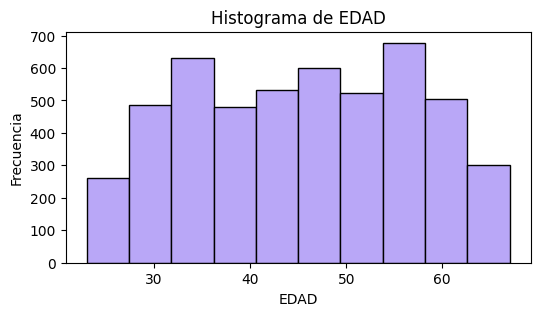

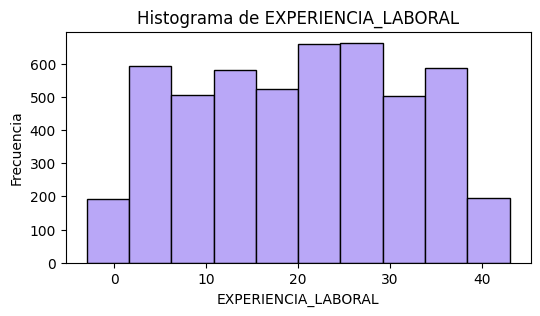

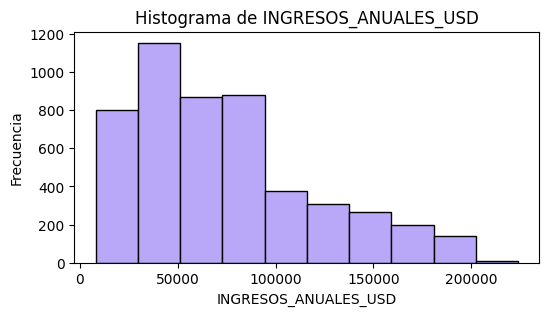

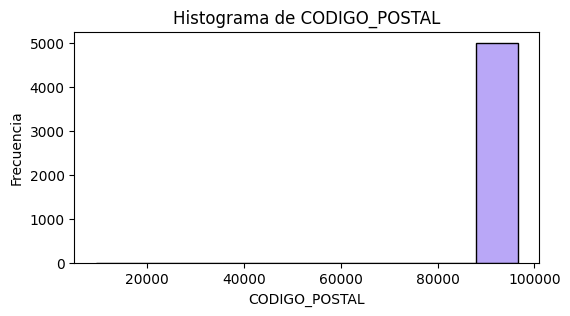

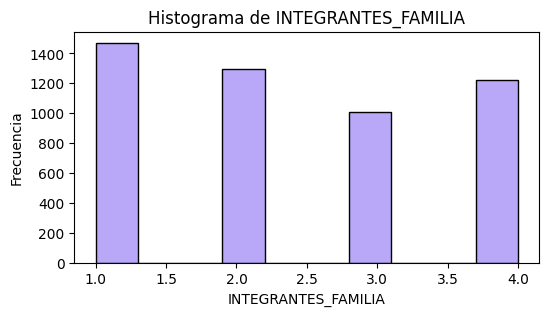

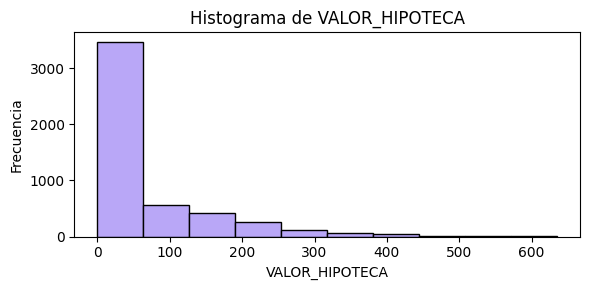

In [18]:
plot_histograms(df, 10)

In [19]:
def plot_boxplot(dataframe):
    # Obtener las columnas numéricas
    numeric_columns = dataframe.select_dtypes(include=['int', 'float'])

    # Configurar el tamaño de la figura
      # Cambia el tamaño aquí según tus necesidades

    # Iterar a través de las columnas numéricas y trazar histogramas uno debajo del otro
    for i, col in enumerate(numeric_columns.columns):
        plt.figure(figsize=(6, 3))
        dataframe[col].plot.box()
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks([])

    plt.tight_layout()  # Ajustar el espaciado entre gráficos
    plt.show()


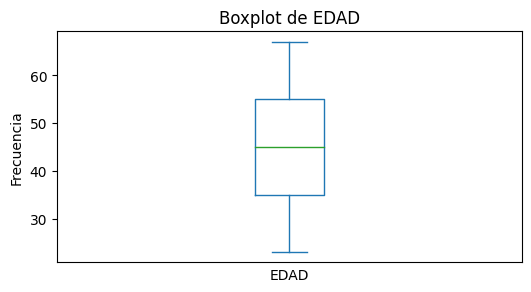

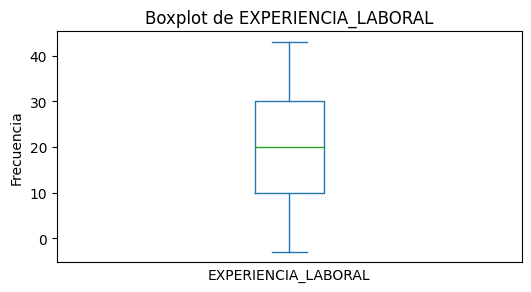

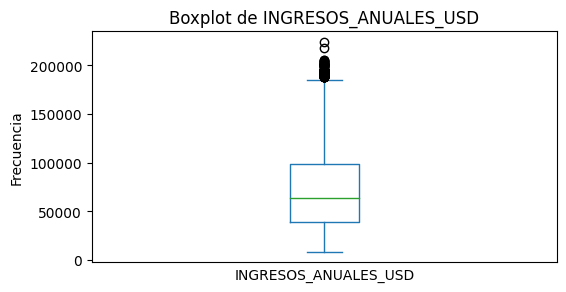

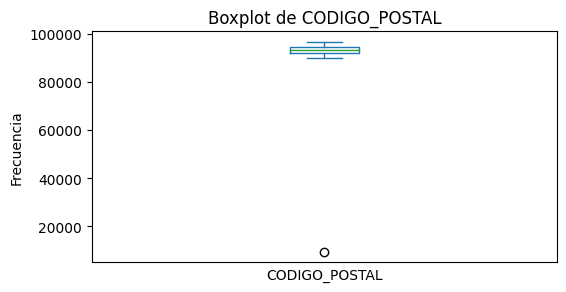

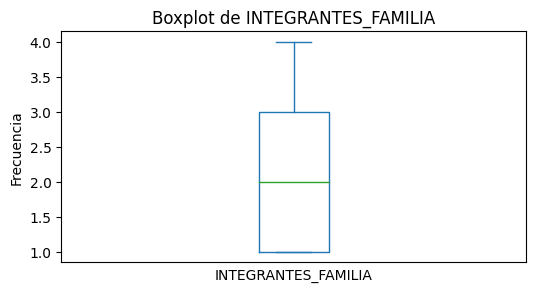

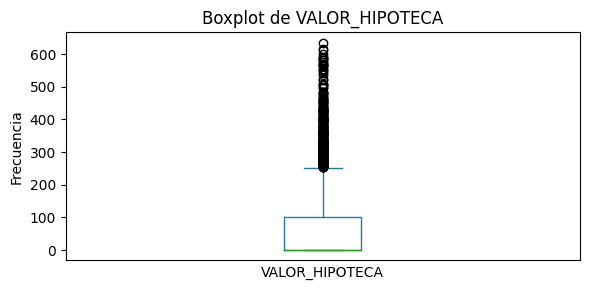

In [20]:
plot_boxplot(df)